<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/2_MachineLearning/6_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EA%B5%B0%EC%A7%91%ED%99%94(%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from IPython.display import Image as s

# 군집화(clustering)


- 알고리즘
  - K-mean
  - Mean Shift
  - GMM
  - DBSCAN
- 목적
  - 개체들이 주어졌을 때, 개체들을 몇 개의 클러스터로 나누는 과정
  - 개체들을 그룹으로 나누는 과정을 통해서, 클러스터 내부 멤버들 사잉는 서로 가깝든지, 비슷하게 구성되고, 서로 다른 클러스터(군집) 사이는 멀어지거나, 비슷하지 않게 된다. -> 클러스터링의 목표 -> 데이터의 정답이 없어서 진행하는 과정

# K-mean

- 가장 일반적이고, 많이 사용되는 알고리즘
- 거리 기반 알고리즘
- 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

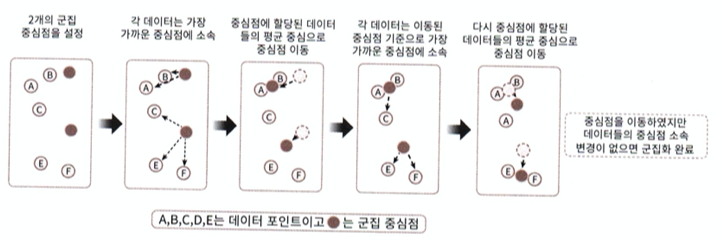

In [144]:
'''
1. 군집 중심점을 원하는 군집화 개수(설정, iris라면 3개)만큼 임의의 위치에 놓는다.
  - 랜덤으로 구성했을 때 운 나쁘면 아주 오래 걸릴 것이다. => 단계가 많아질 것이다.
  - 실제로는, 밀도나 평균 등을 이용하여 중심점이 높을 확률 가진 지점에 최초 포인트를 두는 것이 빠른 처리가 되는 방법
  - 해당 위치에서 가까운 포인트들의 평균점에 위치 선택
2.  이렇게 이동된 중심점에서 가장 가까운(기준값이 존재할 수도, 계산해서 나올 수도 있고) 포인트로 이동
3. 군집 중심점을 평균 지점으로 계산해서 이동 -> 계산/이동 반복
  - 점점 군집들의 범위가 커진다.
4. 언젠가는 군집 중심점의 이동이 없게 된다. -> 군집화가 완료되었다.
'''

s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/k-mean_0.png', width=1000)

- 장점
  - 가장 많이 활용됨
  - 알고리즘이 쉽고 간결하다. 직관적이다.
- 단점
  - 거리 기반 알고리즘으로서, 데이터가 많으면(or 피처가 많으면) 군집화 정확도가 떨어질 수 있다.
    - 차원 축소를 통해서 차원을 줄여라!
  - 반복 횟수가 많으면 오래 걸린다.
  - 몇 개로 그룹화해야 적정한지 정하기가 어렵다.

In [4]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.datasets import load_iris
# KMeans : 알고리즘이니까 클래스, k_means : 함수
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
# 데이터 준비
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_df = pd.DataFrame( iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] )
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# KMeans 파라미터
'''
n_clusters : 군집화의 개수, 군집 중심점의 개수 -> 3
init : 군집 중심점의 좌표를 설정하는 방식
max_iter : 최대 반복 횟수, 군집 중심점이 이동하는 최대 횟수, 이 횟수에 도달하면 or 이동이 없으면 종료
'''
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

In [8]:
# 훈련
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [9]:
# 각 데이터 포인트가 어떤 그룹에 속했는가? 확인
kmeans.labels_, len(kmeans.labels_)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32),
 150)

In [10]:
# 군집의 군집 중심점의 좌표
# shape : (군집개수, 피처개수)
kmeans.cluster_centers_, kmeans.cluster_centers_.shape

(array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]]), (3, 4))

In [11]:
# 얼마나 잘 군집화가 되었는가 => 정답을 모르는 상황에서 오직 데이터만 가지고 거리 기반으로 군집화(클러스터링)를 수행하였다.
# 이렇게 분류된 그룹이 실제 정답과 얼마나 일치하는지 확인
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_     # 0, 1, 2는 그룹을 나눈 인덱스값이지 종을 표현하는 것은 아니다.
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [12]:
# 실제 분류값과 차이 확인
iris_df.groupby(['target', 'cluster'])['sepal_length'].count()
# 0번 품종은 그룹화가 잘 된다.
# 1/2번 품종은 데이터들이 많이 겹쳐있다보니 거리 기반으로 그룹화를 하면 거의 완벽하게 그룹화되지 않는다. 종이 섞여서 그룹화가 된다.
# 분류타겟 0번종인데, 그룹이 모두 1번이므로 완벽
# 분류타겟 1번종 중 48개는 2번으로 군집이 잘 되었으나 2개가 오류
# 분류타겟 2번종 중 36개는 0번으로 군집이 잘 되었으나 14개가 오류
# -> PCA 등을 이용한 차원축소를 통해 군집화해야겠다.

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

## 차원축소
- 피처가 이미 종별로 겹쳐지는 부분이 보이므로 차원축소를 통해서 종별로 구분지어 놓고 군집을 진행하면, 결과가 얼마나 좋아지는지 체크를 하겠다.

In [13]:
from sklearn.decomposition import PCA

In [14]:
# PCA를 이용하여 차원을 2개로 줄여서 컬럼명은 pca_1, pca_2로 명명하여 iris_df를 생성, 상위 2개 출력
# 실습
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df.iloc[:, :-2])
iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_1','pca_2'])
iris_pca_df.head(2)

,pca_1,pca_2
0,-2.684126,0.319397
1,-2.714142,-0.177001


In [15]:
# 강의
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)
iris_df['pca_1'] = iris_pca[:, 0]
iris_df['pca_2'] = iris_pca[:, 1]
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001


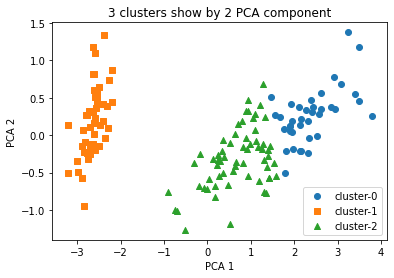

In [16]:
# 분포도를 그려서 잘 구분이 되는지 확인
# 그릴 대상 => 군집별로 3번 그린다. x축 pca_1, y축 pca_2
# 마커 => ['o','s','^'], label=cluster-0(군집값 0)

markers = ['o','s','^']

for idx, marker in enumerate(markers) :
  # cluster값이 idx인 대상만 모아서 그 중에 컬럼이 pca_1 데이터
  x = iris_df[iris_df['cluster'] == idx]['pca_1']
  # cluster값이 idx인 대상만 모아서 그 중에 컬럼이 pca_2 데이터
  y = iris_df[iris_df['cluster'] == idx]['pca_2']
  plt.scatter(x=x, y=y, marker=marker, label=f'cluster-{idx}')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters show by 2 PCA component')
plt.show()

# PCA를 적용한 2개의 피처 입장에서 보면, 군집은 잘 분류되어 있다.
# but 군집은 어떤 데이터를 가지고 생성했는가? iris.data(4-D)를 가지고 만든 클러스터링이다.
# 절차 => iris.data(4-D)를 PCA를 통해(차원축소를 해서) 2-D로 만든다. -> clustering(3개) -> 평가

In [17]:
# pca_1, pca_2
iris_df2 = iris_df.iloc[:, -2:]

In [18]:
# pca 2-D -> clustering -> 평가
kmeans2 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans2.fit(iris_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
iris_df2['target'] = iris.target
iris_df2['cluster'] = kmeans2.labels_
iris_df2.head()

,pca_1,pca_2,target,cluster
0,-2.684126,0.319397,0,0
1,-2.714142,-0.177001,0,0
2,-2.888991,-0.144949,0,0
3,-2.745343,-0.318299,0,0
4,-2.728717,0.326755,0,0


In [20]:
iris_df2.groupby(['target', 'cluster'])['pca_1'].count()
# iris 데이터를 이용하여 pca 후 군집을 진행한 결과가 pca를 하지 않고 군집을 하는 결과와 대조해보았을 때, 성능향상을 볼 수 없었다.
# 단, iris 데이터의 경우일 뿐, 다른 데이터도 같은 성향을 보인다고 설명할 수는 없다.

target  cluster
0       0          50
1       1          47
        2           3
2       1          14
        2          36
Name: pca_1, dtype: int64

In [21]:
iris_df.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

## 군집 평가(Cluster Evaluation)


- '군집화가 잘 되었는가?' 평가를 수행해야 한다. 군집이 잘 되었는지를 확인한다.
  - 몇 개로 군집을 해야 잘 분류가 되는가?
  - 지표 : 실루엣 분석(대표적인 방법)

## 실루엣 분석
- Silhouette Analysis
- 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타낸다.
  - 평가 기준 : 다른 군집과의 거리는 잘 떨어져있고, 군집 내의 포인트들은 잘 모여있는가
  - 잘 군집되어 있다면, 비슷한 정도의 여유 공간을 가진 것이다.
- 방법
  - 실루엣 계수를 기반으로 분석
    - 개별 데이터가 가지는 군집화 지표
    - 데이터 1개는 소속 군집 안에서 얼마나 가깝게 지표를 가지고, 다른 군집과의 데이터와 비교하면 얼마나 멀리 떨어져있는지 확인할 수 있다.

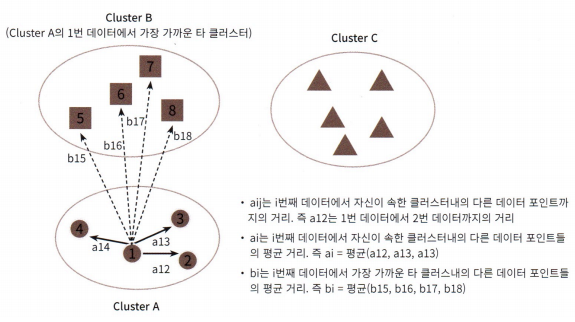

In [22]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_실루엣_1.png', width=800)

# 군집A의 1번 포인트의 평균거리 a_i는 동일 군집 내에 존재하는 모든 포인트 간의 거리의 평균이다.
# 군집A의 1번 포인트의 평균거리 b_i는 다른 군집(B 혹은 C) 내에 존재하는 모든 포인트 간의 거리의 평균이다.

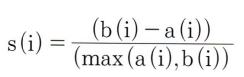

In [143]:
'''
i                              : 특정 데이터 포인트
s{i}                           : i 포인트의 실루엣 계수
a(i)                           : i번째 포인트와 같은 군집 내에 나머지 모든 포인트들 간의 평균 거리
b{i}                           : i번째 포인트와 다른 군집 내에 나머지 모든 포인트들 간의 평균 거리
b(i) - a(i)                    : i 포인트 기준으로 보는 두 군집 사이의 거리
b(i) - a(i) / max(b(i) - a(i)) : 정규화를 위해서 거리의 최대값으로 나누었다.
-1 ~ 1 범위에서 나올 수 있고, 1에 가까울수록 2개의 군집은 더 멀리 떨어져있다. => 군집화가 잘 되어 있다.
                              0에 가까울수록 두 군집은 가까워진다.
(-)는 군집이 겹쳤다. => 데이터 포인트가 다른 군집 것이 할당되었다. -> 재작업 or 보정 필요!
'''

s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_실루엣_2.png', width=300)

## 방법, 판단
  - silhouette_score()
  - 전체 실루엣 계수의 평균값은 0 ~ 1 사이 존재하고, 1에 가까울수록 군집이 잘 됐다고 평가
  - 전체 실루엣 계수의 평균과 개별 군집의 평균값의 편차가 작아야 좋다.

In [24]:
# 실루엣 계수 사용을 위한 도구
from sklearn.metrics import silhouette_score, silhouette_samples\

In [25]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


In [26]:
iris_df = iris_df.iloc[:, :4]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
# kmeans로 군집, 군집은 3개, 최대 반복 횟수는 300회, 난수시드 0
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [28]:
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [29]:
# iris의 개별 데이터에 실루엣계수 계산
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
score_samples.shape

(150,)

In [30]:
score_samples[:10]

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ])

In [31]:
# iris_df에 추가
iris_df['silhouette_coeff'] = score_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [32]:
# 모든 데이터에 평균 실루엣 계수값 획득
average_score = silhouette_score(iris.data, iris_df['cluster'])
average_score
# 1에 가까우면 군집이 잘 됐다.
# 0.55면 중간 정도 레벨, 성분을 확인 -> 군집별 실루엣 계수 평균

0.5528190123564091

In [33]:
# 군집별 실루엣 계수 평균
iris_df.groupby('cluster')['silhouette_coeff'].mean()
# 0번, 2번 군집의 성능이 낮아서, 군집화가 상대적으로 잘 안 되어서, 전체값이 낮다.

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

## 시각화, 최적화
- 군집별 평균 실루엣 계수의 시각화를 통해 군집 계수 최적화
- 원래 데이터를 가지고 군집을 몇 개를 해야하는지는 알 수 없다.(단, 데이터에 대한 사전 정보를 일부 안다면, 후보군(2개, 3개, ...)을 뽑아 이를 평가해서 선정할 수 있다.)

In [34]:
# 시각화 -> 실루엣계수를 면적으로 표기해서 시각화
def visual_silhouette_check(cluster_list, features) :
  # 모듈 가져오기는 파이썬 코드 어디서든 사용 가능, 주로 코드 맨 위에서 사용할 뿐(여기는 함수 내 사용 가능하다는 것 공부 용도)
  from sklearn.metrics import silhouette_score, silhouette_samples
  from sklearn.cluster import KMeans
  import matplotlib.pyplot as plt
  import matplotlib.cm as cm
  import numpy as np
  import pandas as pd
  # 클러스트 후보 개수
  n_cols = len(cluster_list)
  # 좌표축(시각화 => 한줄에 n_cols의 개수만큼 차트를 그린다.)
  # figsize=(n_cols*4, 4) 등 정방행렬이면 OK
  fig, axs = plt.subplots(figsize=(n_cols*5, 5), nrows=1, ncols=n_cols)

  # 군집화의 개수에 따라 처리 진행
  # idx  : 군집의 번호 0, 1, ...
  # size : 군집의 개수(몇개로 군집화할 것인가)
  for idx, size in enumerate(cluster_list):
###############################################################################################################################################
    # 시각화를 위해 데이터 준비
    # 1. 군집화 알고리즘 생성
    cluster_model = KMeans(n_clusters=size, max_iter=500, random_state=0)
    # 2. 훈련 -> 군집 정보 추출 -> 군집화 알고리즘의 예측 결과 => 어느 데이터가 어느 군집에 속한다.
    cluster_label = cluster_model.fit_predict(features)
    # 3. 개별 데이터의 실루엣 계수
    sil_values = silhouette_samples(features, cluster_label)
    # 4. 군집의 평균 실루엣 계수
    sil_avg = silhouette_score(features, cluster_label)
###############################################################################################################################################
    # 시각화(차트 드로잉)
    # 제목
    axs[idx].set_title(f'cluster counts {size}, {round(sil_avg, 3)}')
    # 라벨
    axs[idx].set_xlabel('silhouette coefficiency')
    axs[idx].set_ylabel('cluster label')
    # 값의 제한 -> 모든 차트의 축의 범위가 동일해짐 -> x축, y축
    # x축의 좌표 표현 -> 실루엣 계수, -0.1~1.0(x축의 범위값은 -0.1 정도 확장해서 보이는 부분이 잘 구분되도록, - 나오면 사실상 다시 해야 됨)
    axs[idx].set_xlim([-0.1, 1])
    # y축의 클러스터 군집 번호 표현, 최대 0~1, 0~2, 0~3, 0~4 (candi_clusters = [2,3,4,5]니까)
    # ylim은 그래프 문제가 있어서 주석 처리
    # axs[idx].set_ylim([0, (size + 1) * 10])
    # x축은 디테일하게 좌표를 표현
    axs[idx].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
###############################################################################################################################################
    # 클러스터 개수별로 영역을 그리기
    y_std_lower = 10            # 이 값은 군집을 그리는 기준 좌표값 -> 군집을 그리면 계속 들가
    for i in range(size) :      # 군집 개수에 맞춰서 0부터 나올 것임(0번 군집, 1번 군집, ...)
      # 대상 군집별로 데이터를 구한다.
      # numpy의 bollean 인덱싱을 사용하여 해당 군집 데이터만 추출
      i_cluster_sil_values = sil_values[cluster_label == i]
      # 정렬
      i_cluster_sil_values.sort()
      x2 = i_cluster_sil_values
###############################################################################################################################################\
      # 범위
      i_size_cluster = i_cluster_sil_values.shape[0]    # 0번 군집의 데이터 개수
      y = np.arange(y_std_lower, y_std_lower + i_size_cluster)      # 임의의 시작값을 10으로 설정
      x1 = 0
      # 색상을 군집별로 구분하기 위해 사용
      # cm.nipy_spectral(해당 군집 번호 / 클러스터의 개수)
      color = cm.nipy_spectral( i/size )
      
      axs[idx].fill_betweenx(y, x1, x2, facecolor=color, edgecolor=color, alpha=0.7)
      # 다음 군집을 그리기 위해 기준 좌표값을 증가
      y_std_lower = y_std_lower + i_size_cluster + 10
      # 군집의 왼쪽, 중심부에 군집 번호를 드로잉
      axs[idx].text(-0.1/2, y_std_lower+i_size_cluster/2, str(i))

      # 평균값 드로잉 => 군집의 끝 모양들이 실루엣 평균값을 넘어서야 한다.
      axs[idx].axvline(x=sil_avg, color='red', linestyle="--")

In [35]:
# 조건 부여, 데이터 생성(더미 데이터 생성)
from sklearn.datasets import make_blobs

In [36]:
'''
n_samples   : 생성할 데이터의 개수
n_features  : 피처수, 특성을 몇 개로 할 것이냐, 기본값은 2개(x, y)
centers     : 군집의 개수, 정수/배열(군집 중심점의 좌표)
cluster_std : 생성된 군집의 표준 편차, 값을 한개만 지정하면 모든 군집에 적용됨, 리스트로 쓰면 개별 군집에 적용
'''

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0, random_state=1)

In [37]:
# X 데이터의 피처 2개, y는 정답(용도는 군비과 비교 시 사용 : 잘 군집화되었는지 체크 용도)
X.shape, y.shape

((500, 2), (500,))

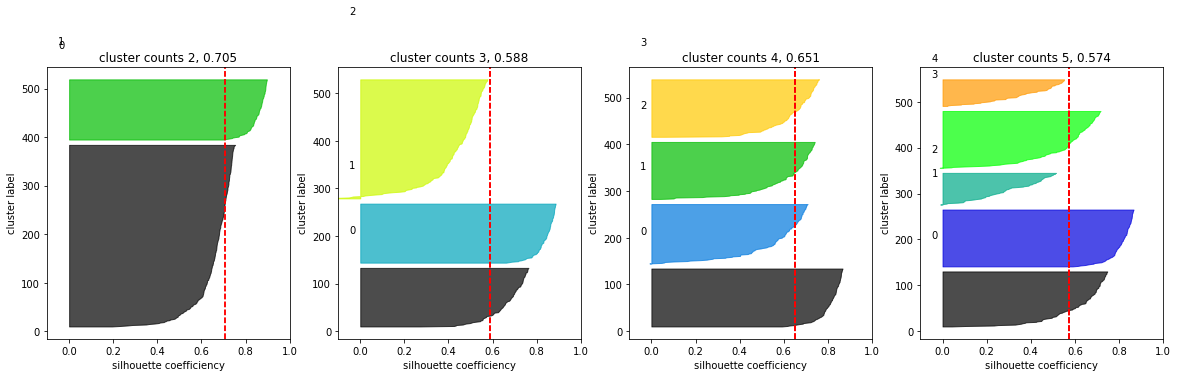

In [38]:
# 최적의 군집 개수를 구하기 위해서 후보 리스트 준비
# 정답이 4인 것을 알고있지만 임의로 설정
candi_clusters = [2,3,4,5]      # 군집 후보군('몇개가 가장 잘 군집화되는 개수인가?'의 후보들)
# 시각화
visual_silhouette_check(candi_clusters, X)
# 군집의 개수는 2개 혹은 4개가 적절하다.

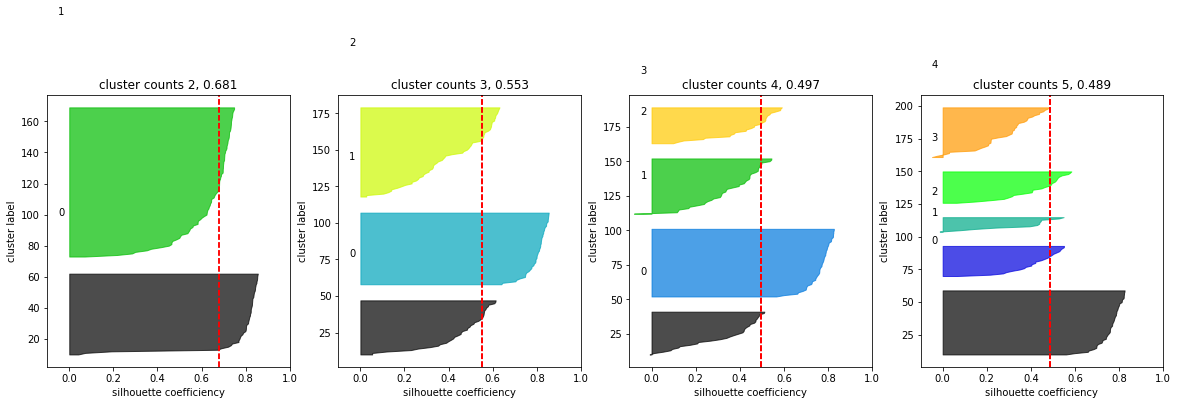

In [39]:
# iris 데이터에 대해서 몇개의 군집이 가장 성능이 좋은지 교차 검증해서 시각화
X2 = load_iris().data
visual_silhouette_check(candi_clusters, X2)
# iris 경우, 실루엣 평균값 기준에서는 군집 2개가 적합
# 군집 3개인 경우도 조건은 만족하나, 1번 군집과 0/2번 군집 간의 편차가 크다.
# 실루엣 계수를 이용하여 해당 데이터를 몇 개의 군집으로 그룹화할 것인지 비교 검증하는 과정

# 평균이동(Mean Shift)

- 밀도 기반 알고리즘
- 특정 대역폭(bandwidth)을 가지고 최초의 확률 밀도 중심에서 확률 밀도 중심이 높은 쪽으로 중심 이동을 하는 방식

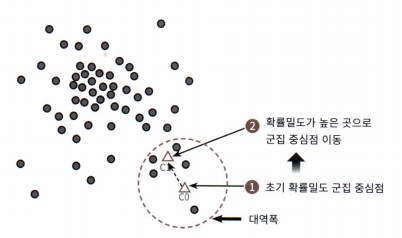

In [40]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_meanshfit_1.png', width=600)

# 1. 데이터의 분포도를 이용하여 군집 중심점을 찾는다
# 2. 확률 밀도 함수(probability density function)를 활용 : KDE(kernel density estimation) 이용
# 3. 가장 집중적으로 데이터가 모여 있을 곳이 군집 중심점이 될 것이다.
# 4. 대역폭 : 밀도를 계산할 때 경계선(그림상에서는 원형)

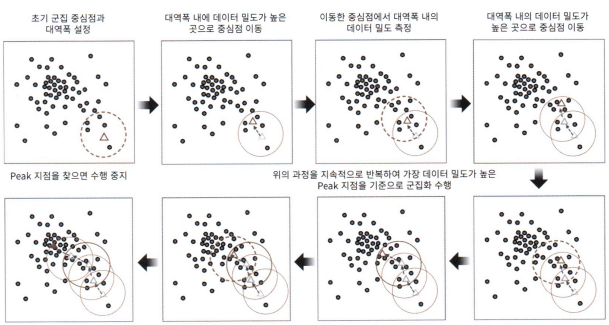

In [41]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_meanshfit_2.png', width=1000)

# 대역폭을 잡고, 그 안에 있는 데이터 포인트들의 밀도를 잡고, 가장 밀도가 높은 쪽으로 중심점 이동
# -> 해당 중심점을 기준으로 다시 대역폭을 펼치고 => 반복(데이터의 밀도가 가장 높은 곳에 도착할 때까지)
# 반복횟수, 대역폭 => 군집화의 품질은 무엇으로 결정되는가? => 대역폭의 크기!
# 군집의 개수를 지정할 필요가 없다! -> 대역폭의 크기에 따라 군집의 개수가 결정된다.

In [42]:
# 더미데이터 활용
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
X.shape, y.shape

((200, 2), (200,))

In [43]:
from sklearn.cluster import MeanShift

In [44]:
# 알고리즘 생성
meanshift = MeanShift(bandwidth=0.9)

In [45]:
# 훈련 및 예측(예측의 결과물 : 데이터 포인트들을 군집해서 배치)
cluster_labels = meanshift.fit_predict(X)

In [46]:
# 군집된 수는 몇 개? => 8개
# (원본 데이터를 알고있기 때문에) 원래 설계된 군집은 3개였는데 8개로 나왔다 => bandwidth가 작아서
type(cluster_labels), np.unique(cluster_labels), len(np.unique(cluster_labels))

(numpy.ndarray, array([0, 1, 2, 3, 4, 5, 6, 7]), 8)

In [47]:
# bandwidth 값을 올려서 확인
meanshift = MeanShift( bandwidth=(0.9)+0.1 )
cluster_labels = meanshift.fit_predict(X)
type(cluster_labels), np.unique(cluster_labels), len(np.unique(cluster_labels))
# 대역폭을 0.1만 올리니까 원래 설계된 대로 군집개수가 나왔다.
# meanshift의 최적화 포인트는 대역폭 조정이다.

(numpy.ndarray, array([0, 1, 2]), 3)

In [48]:
# 최적의 bandwidth를 찾는 방법 -> KNN 알고리즘(최근접이웃, K-Nearest Neighbor Algorithm)을 활용
from sklearn.cluster import estimate_bandwidth

In [49]:
# quantile : 전체 데이터가 100건 있다. 만약 이 값이 0.3이면 30건에 대해서 KNN을 적용하여 클러스터링을 수행 -> 비교하여 bandwidth 찾는 과정을 수행
bandwidth = estimate_bandwidth(X, quantile=0.2)   # quantile=0.2 : 40개 데이터를 활용(이 개수의 증가 비교도 필요함)
bandwidth

1.443521103865421

In [50]:
# iris 데이터에 meanshift를 이용하여 군집을 수행한다.
# 최적 bandwidth는 estimate_bandwidth 함수를 이용하고, 값을 찾을 때 샘플은 20%를 적용해라
# 군집의 개수를 출력하시오
iris = load_iris()
bandwidth = estimate_bandwidth(iris.data, quantile=0.2)
meanshift = MeanShift(bandwidth)
cluster_labels = meanshift.fit_predict(iris.data)
type(cluster_labels), np.unique(cluster_labels), len(np.unique(cluster_labels))

(numpy.ndarray, array([0, 1]), 2)

In [51]:
# 시각화
cluster_df = pd.DataFrame(data=X, columns=['c1', 'c2'])
cluster_df['target'] = y
cluster_df.head()

,c1,c2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [52]:
# 0.2값은 조정해가면서 성능을 점검할 수 있다.
best_bandwidth = estimate_bandwidth(X, quantile=0.2)
best_bandwidth

1.443521103865421

In [53]:
meanshift = MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

In [54]:
# best_bandwidth를 적용하니 군집의 개수가 4개로 증가되었다.
np.unique(cluster_labels)

array([0, 1, 2, 3])

In [55]:
# bandwidth값은 분류, 회귀까지 가서 성능을 보고 판다
best_bandwidth = estimate_bandwidth(X, quantile=0.3)
print(best_bandwidth)
meanshift = MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

2.0022669597980554


array([0, 1])

In [56]:
best_bandwidth = estimate_bandwidth(X, quantile=0.25)
print(best_bandwidth)
meanshift = MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

1.6889636737559222


array([0, 1, 2])

In [57]:
# 시각화
cluster_df['cluster_label'] = cluster_labels
cluster_df.head()

,c1,c2,target,cluster_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


In [58]:
meanshift.cluster_centers_

array([[ 0.90425412,  4.43969979],
       [-1.63547329,  2.84588284],
       [ 1.84011231,  0.83840976]])

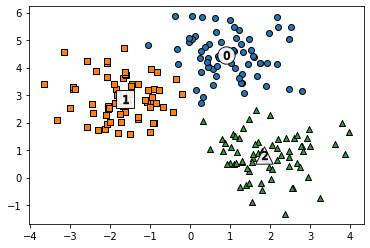

In [59]:
# marker
markers = ['o','s','^', 'x', '*']
for label in np.unique(cluster_labels) :
  # cluster_df 중에서 군집이 label인 데이터만 추출
  label_cluster_df = cluster_df[cluster_df['cluster_label'] == label]
  # 데이터 분포도
  plt.scatter(x=label_cluster_df['c1'], y=label_cluster_df['c2'], edgecolors='k', marker=markers[label])
  # 군집번호 => 군집중심점(데이터 포인트들 중 밀도가 가장 높은 지점)에 표현
  # 군집 중심점의 좌표
  cx, cy = meanshift.cluster_centers_[label]
  plt.scatter(x=cx, y=cy, s=300, color='white', edgecolors='k', alpha=0.9, marker=markers[label])
  # 군집번호 => 숫자를 산포도의 마커로 사용
  plt.scatter(x=cx, y=cy, s=70, color='k', edgecolors='k', alpha=0.9, marker=f'${label}$')
plt.show()

In [60]:
# 실제 답과 비교
cluster_df.groupby('target')['cluster_label'].value_counts()
# 거의 완벽하게 군집구성과 실제 타겟값이 1:1로 매칭되었다. (오류 1건)

target  cluster_label
0       0                67
1       2                67
2       1                65
        2                 1
Name: cluster_label, dtype: int64

```
- 장점
  - 유연한 군집화 可
  - 군집의 개수를 미리 정할 필요 X
  - 이상치가 큰 영향을 미치지 X -> ∵밀도 중심
- 단점
  - 알고리즘 수행시간이 길다.
  - 대역폭에 따라 군집 영향도가 크다.
- 용도
  - 컴퓨터 비전에서 많이 사용
  - 이미지, 영상 데이터상에서 특정 개체 구분, 움직임 등을 추출할 때 많이 사용(뛰어나다.)
```

# GMM
- Gaussian Mixture Model
- 확률 기반 알고리즘
- 데이터에 여러 개의 가우시안 분포(정규분포)를 모델에 섞어서 생성된 모델을 가정하고 군집화를 수행한다.
  - 가우시안 분포 : 좌우 대칭형 종 형태를 가진 연속 확률 변수

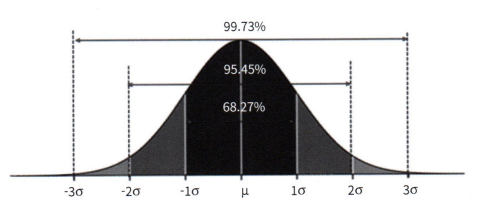

In [145]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gmm_1.png', width=600)

# 완벽한 좌우 대칭, 평균이 0이고, 표준편차 1인 데이터의 정규분포를 표준 정규분포라고 정의한다.

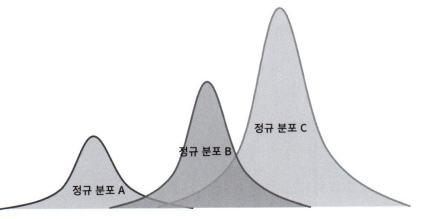

In [62]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gmm_2.png', width=600)

# 이런 정규분포가 3개가 있다.
# 3개를 합치면 아래 그림처럼 된다.

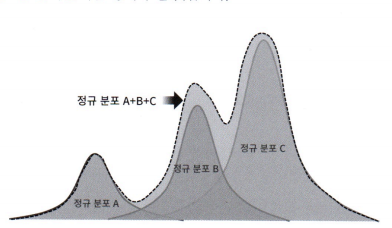

In [63]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gmm_3.png', width=600)

# 정규분포 A+B+C

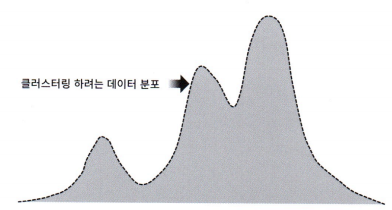

In [64]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gmm_4.png', width=600)

# 군집화하고자 하는 데이터의 분포도가 이런 정규분포 3개가 걸쳐있는 형태와 같다면
# 마치 정규분포 A, B, C가 합쳐져서 만들어진 것임을 알 수 있다.

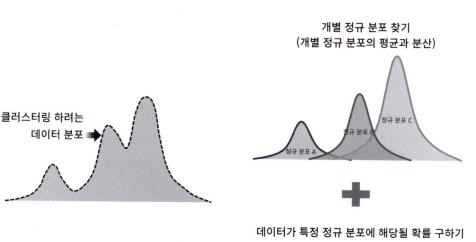

In [65]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gmm_5.png', width=600)

# 전체 데이터 세트는 서로 다른 정규분포를 가진 여러 개의 확률 분포 곡선으로 구성된 것이다.
# 이를 정규분포 단위로 군집화하는 것 GMM의 군집화 방법이다.

- 예
  - 2000개의 데이터 세트가 존재
  - 이 데이터를 구성하는 여러 개의 정규분포 곡선을 추출
  - 개별 데이터가 어느 정규분포에 포함되는지 결정
  - 이런 일련의 과정을 **모수 추정**이라고 한다.
  - 2가지 모수 추정의 추정 내용
    - 개별 정귷 분포의 평균과 분산
    - 각 데이터가 어느 정규 분포에 해당될 것인지 확률 구하기

In [66]:
# iris 데이터 df로 구성
from sklearn.datasets import load_iris
# 알고리즘 2개는 서로 비교하기 위해서 포함
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [67]:
# 데이터 로드 및 df 구성
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [68]:
iris_df['target'] = iris.target
iris_df.shape

(150, 5)

In [69]:
# 군집
gmm = GaussianMixture(n_components=3, random_state=0)

In [70]:
gmm.fit(iris.data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [71]:
gmm_cluster_labels = gmm.predict(iris.data)
gmm_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
# 실제 타겟과 군집으로 분류된 값들이 얼마나 상이한지 확인
iris_df['gmm_cluster'] = gmm_cluster_labels
iris_result = iris_df.groupby('target')['gmm_cluster'].value_counts()
iris_result

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64

In [73]:
# kmeans를 이용하여 같은 내용을 구현, 군집 개수 3개, init은 기본값 적용, 반복횟수는 300회, 난수 0
# 알고리즘 생성
kmeans = KMeans(n_clusters=3, random_state=0)
# 학습 및 예측
iris_df['kmeans_cluster'] = kmeans.fit_predict(iris.data)
# 평가
iris_df.groupby('target')['kmeans_cluster'].value_counts()
# 비교 결과, 붓꽃 데이터는 kmeans보다 GMM이 더 효과적으로 군집처리를 한다.
# kmeans => 거리 기반이므로 데이터가 원형으로 넓게 퍼져있을 때 유리하다!
# 데이터를 먼저 산포도를 그리고 데이터의 추세/밀도/형태 등을 판단해서 가장 적합한 군집 알고리즘을 적용하면 더욱 시간을 단축할 수 있다.
# 아니면, 기계적으로 알고리즘을 돌려보면서 군집개수를 조정(아닌 것도 있을 것이다.)하면서 크로스체크하면 가장 적합한 형태가 나올 것이다.

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64

## 시각화
- 더미 데이터를 이용해서 시각적으로 군집 알고리즘의 적용 차이점을 확인한다.
- kmeans, gmm을 확인

In [74]:
# 시각화 함수
# 군집별로 그린다. 알고리즘을 전달하면, 해당 알고리즘으로 군집하고, 
# dataframe 안에는 특정 알고리즘으로 군집화된 레이블값이 전달되서 시각화된다.
# 포인트/군지중심점 그린다.
# cluster name : kmeans_labels, gmm_labels, target 등 포인트들을 구분할 수 있는 대상 컬럼명 지정
# cluster_obj : 군집화 알고리즘 객체 -> 이것을 통해서 군집중심점을 구한다.
def visual_cluster_plt(dataframe, cluster_name='target', isCenterShow=False, cluster_obj=None):
  # 군집별 혹은 타겟별 고유한 목록을 추출
  unique_labels = dataframe[cluster_name].unique()
  # 군집별 다른 마커로 그리겠다.
  markers = ['s', 'x', '^', '+', '*', 'o']
  # 군집별로 돌면서
  for label in unique_labels :
    # 대상 군집 데이터 or 타겟 데이터만 모은다.
    cluster_label = dataframe[ dataframe[cluster_name] == label ]
    # 산포도로 그린다.
    plt.scatter(x=cluster_label['com1'], y=cluster_label['com2'], s=50, edgecolor='white', marker=markers[label], 
                # 군집여부에 따라서 레이블 표현을 다르게 처리했다.
                label='%s-%d'%('cluster' if isCenterShow else 'target', label))
    # 군집중심점 드로잉
    if isCenterShow :
      centers = cluster_obj.cluster_centers_[label]
      plt.scatter(centers[0], centers[1], s=250, color='white', alpha=0.9, edgecolors='k', marker=markers[label])
      plt.scatter(centers[0], centers[1], s=70, color='white', edgecolors='k', marker='$%d$'%label)
  # 시각화 마무리
  plt.legend()
  plt.show()

In [75]:
# 데이터 구성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

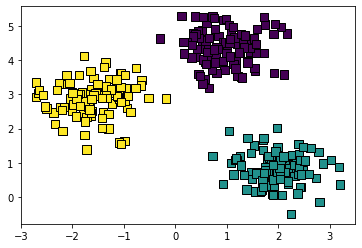

In [76]:
# X에 대해서 산포도를 그리시오.
plt.scatter(X[:, 0], X[:, 1], s=70, c=y, marker='s', edgecolors='k')

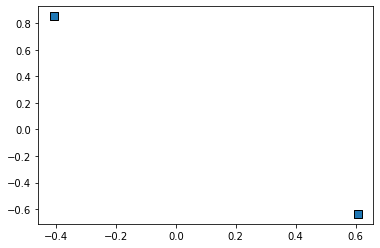

In [77]:
# 데이터를 전체적으로 왼쪽 상단이 높고 우측 하단이 낮은 대각선으로 만든다.
# 일종의 대각선 커널(행렬)을 만들고(딥러닝에 나오는 개념) 내적을 통해서 전체 데이터를 대각선 형태로 조정
kernel_matrix = np.array([[0.608, -0.636], [-0.408,0.852]])
plt.scatter(kernel_matrix[:,0],kernel_matrix[:,1], s=70, marker='s', edgecolors='k')
# 이런 모양으로 데이터가 재배치될 것이다.

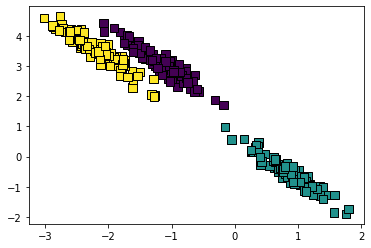

In [78]:
# X와 kernel_matrix 간의 내적 수행
# X는 (300,2), matrix는 (2,2) : 앞쪽 행렬의 마지막 값과, 뒤쪽 행렬의 처음 값의 크기가 같아야한다. 여기서는 2.
X_trans = np.dot(X, kernel_matrix)
plt.scatter(X_trans[:,0],X_trans[:,1], s=70, c=y, marker='s', edgecolors='k')

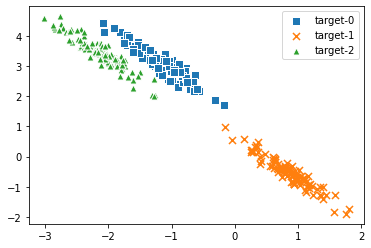

In [79]:
# df 구성
cluster_df = pd.DataFrame(X_trans, columns=['com1','com2'])
cluster_df['target'] = y
# 시각화 함수 호출
visual_cluster_plt(cluster_df)

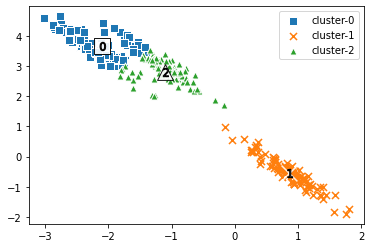

In [80]:
# KMeans 알고리즘 적용하여 시각화
kmeans = KMeans(3, random_state=0)
cluster_df['kmeans_labels'] = kmeans.fit_predict(X_trans)
visual_cluster_plt(cluster_df, cluster_name='kmeans_labels', isCenterShow=True, cluster_obj=kmeans)

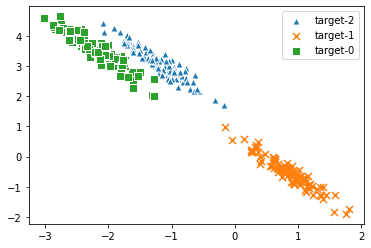

In [81]:
# GMM 알고리즘 적용하여 시각화
gmm = GaussianMixture(n_components=3, random_state=0)
# fit().predict()나 fit_predict()나 같음
cluster_df['gmm_labels'] = gmm.fit(X_trans).predict(X_trans)
# gmm 알고리즘의 작업 특성상 군집중심점은 없다.
visual_cluster_plt(cluster_df, cluster_name='gmm_labels', isCenterShow=False, cluster_obj=gmm)
# 데이터의 분폳도를 보고 적절한 알고리즘을 먼저 통찰을 통해 선택할 수 있다.
# kmeans는 데이터 포인트의 분포가 길게 펼쳐져 있다면, 군집효율이 떨어진다.

# DBSCAN

- Density-based spatial clustering of applications with noise
- 밀도 기반 군집화
- 데이터의 분포가 **기하학적으로 복잡한 데이터 세트**인 경우

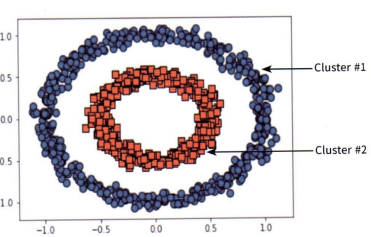

In [82]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_DBSCAN_1.png', width=600)

- 중요 파라미터 -> 알고리즘 구현 시 핵심 파라미터
  - 입실론(epsilon)으로 표현하는 주변 영역
    - 입실론 값은 랜덤 혹은 설정값
    - 개별 데이터를 중심으로 설정한 입실론 값에 의해서 원을 그리는 원형의 영역
  - 입실론 반경 내에 포함된 최소 데이터의 개수
    - 반경 내에 자기자신을 제외한 타 데이터 포인트의 개수 + 자기자신


- 용어
  - 핵심 포인트 : Core Point
    - 주변 영역(입실론 반경) 내에, 설정된 최소 데이터 수 이상으로 타 데이터를 가지고 있다면, 해당 데이터 포인트를 핵심 포인트라고 부른다.
  - 이웃 포인트 : Neighbor Point
    - 주변 영역 내에 위치한 타 포인트를 지칭
  - 경계 포인트 : Border Point
    - 주변 영역 내에 최소의 이웃 포인트가 없다(부족하다). 이웃 포인트 중에 핵심포인트가 있다. -> 군집의 경계선 담당
  - 잡음 포인트 : Noise Point
    - 최소 개수의 이웃 포인트도 없고, 핵심 포인트도 없다.

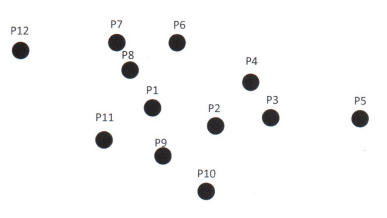

In [83]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gbscan_1.png', width=600)

# 데이터가 아래처럼 분포되어 있다.
# 입실론 반경 내 최소 데이터 포인트 수를 6개라고 한다면(자기 자신 포함) <= 설정

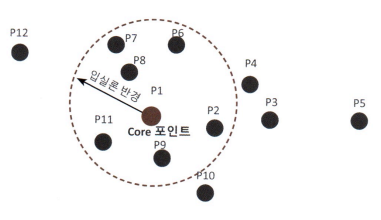

In [84]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gbscan_2.png', width=600)

# P1을 기준으로 입실론 반경 내에 포함된 데이터가 7개다.
# 최소 몇 개(자신 포함) 6개 이상, 자신을 제외하고 5개 이상 포함되어 있다면 P1을 핵심 포인트라고 정의한다.

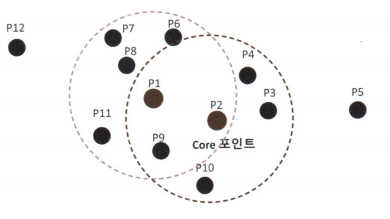

In [85]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gbscan_3.png', width=600)

# P2 기준에서 검토
# P2 핵심포인트다? => 반경 내에 자신 제외 5개, 자신 포함 6개이므로 핵심포인트 O

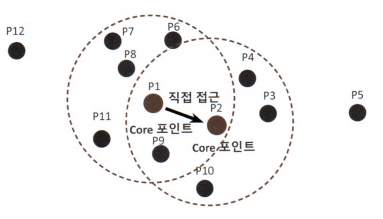

In [86]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gbscan_4.png', width=600)

# P1의 이웃포인트 중 P2도 핵심포인트이므로, P1의 입실론 반경 내에 타 포인트 중 핵심포인트가 있는 경우, 이 2개는 직접 접근이 可

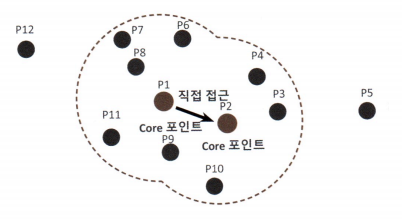

In [87]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gbscan_5.png', width=600)

# 2개의 입실론 반경이 서로 연결되면서 군집화가 된다.
# 이런식으로 반복적으로 군집 영역을 확장하는 방식이 DBSCAN이다.

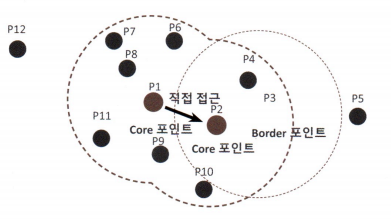

In [88]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gbscan_6.png', width=600)

# P3는 타 데이터 포인트가 2개이므로 핵심포인트 X
# 다만, 타 데이터 포인트로(입실론 반경 내에 타 포인트) 핵심 포인트를 가지고 있으므로 P3는 경계포인트(Border Point)다.
# P3와 같은 경계 포인트 => 군집의 외곽을 담당한다.

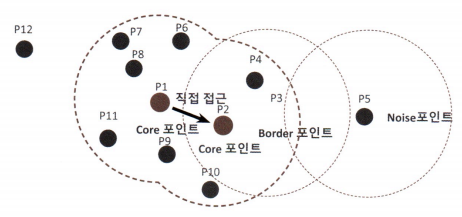

In [89]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_gbscan_7.png', width=600)

# P5는 반경 내 최소 포인트(타 포인트) 없다. 핵심 포인트도 없으므로, P5는 잡음 포인트

In [90]:
iris_df = iris_df.iloc[:, :-2]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
# 알고리즘 생성
from sklearn.cluster import DBSCAN

In [92]:
# eps : 입실론 반경, 주변 영역의 반경
# min_samples : 핵심 포인트를 계산하기 위해/선정되기 위해 입실론 반경 내에 포함되어야 할 타 데이터 포인트 최소개수
#               최소 개수 => 자기자신을 포함한 것
dbscan = DBSCAN(eps=0.6, min_samples=6, metric='euclidean') 
labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_labels'] = labels
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [93]:
# target 대비 dbscan_labels가 얼마나 잘 분류되었는지 평가, 확인
iris_df.groupby(['target'])['dbscan_labels'].value_counts()
# -1 : 잡음 포인트 -> 노이즈
# 군집의 수 => 2개(0, 1), 군집을 하다 보니 2개가 되었다. => DBSCAN은 군집의 수를 필요치 않는다.

target  dbscan_labels
0        0               49
        -1                1
1        1               46
        -1                4
2        1               44
        -1                6
Name: dbscan_labels, dtype: int64

In [94]:
# PCA를 사용하여 다시 군집을 진행 => 4개의 feature로 진행 => 2개로 압축
# iris_df에 pca_1, pca_2 컬럼 추가
from sklearn.decomposition import PCA

# 2개 피처 압출 및 생성
pca = PCA(n_components=2, random_state=0)
pca_trans = pca.fit_transform(iris_df.iloc[:,:4])

# df에 추가
iris_df['com1'] = pca_trans[:, 0]
iris_df['com2'] = pca_trans[:, 1]

# 이 2개 컬럼으로 군집해서 평가해라.
dbscan = DBSCAN(eps=0.6, min_samples=6, metric='euclidean') 
# labels = dbscan.fit_predict( iris_df.iloc[:, -2:].values() )   # 배열로 입력
labels = dbscan.fit_predict(iris_df.iloc[:, -2:])                # 데이터프레임으로 입력
iris_df['dbscan_labels2'] = labels

In [95]:
iris_df.groupby('target')['dbscan_labels2'].value_counts()
# 원래 피처 대비해서 비교해보면 군집의 정답이 3개라는 알고 전제 하에서 평가
# PCA를 해도 개선점이 보이지 않는다.
# 잡음이 좀 더 줄어들었다, PCA

target  dbscan_labels2
0        0                50
1        1                46
        -1                 4
2        1                48
        -1                 2
Name: dbscan_labels2, dtype: int64

In [96]:
iris_df.groupby(['target'])['dbscan_labels'].value_counts()

target  dbscan_labels
0        0               49
        -1                1
1        1               46
        -1                4
2        1               44
        -1                6
Name: dbscan_labels, dtype: int64

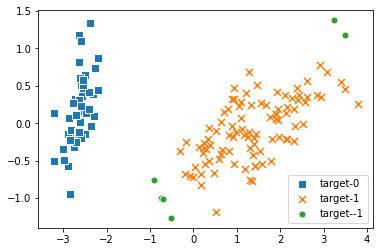

In [97]:
visual_cluster_plt(iris_df, 'dbscan_labels2', False, dbscan)
# DBSCAN에서는 군집이 2개로 이루어졌으므로 +/네모만 군집으로 표기되었고, 동그라미는 잡음 데이터
# DBSCAN은 이런 형태의 데이터(거리 기반, 밀도 기반으로 잡을 수 있는 형태)의 알고리즘보다 군집 효율이 떨어진다
# -> 기하학 모양에서 탁월하니까 그런 데이터로 군집을 수행

In [98]:
# eps 0.6 -> 0.8 : 잡음이 많이 줄어든다.
dbscan = DBSCAN(eps=0.8, min_samples=6, metric='euclidean') 
labels = dbscan.fit_predict(iris_df.iloc[:, -2:])
iris_df['dbscan_labels3'] = labels
iris_df.groupby('target')['dbscan_labels3'].value_counts()

target  dbscan_labels3
0        0                50
1        1                46
        -1                 4
2        1                48
        -1                 2
Name: dbscan_labels3, dtype: int64

In [99]:
dbscan = DBSCAN(eps=0.8, min_samples=6, metric='euclidean') 
labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_labels4'] = labels
iris_df.groupby('target')['dbscan_labels4'].value_counts()
# 잡음이 줄어들었다!

target  dbscan_labels4
0        0                50
1        1                50
2        1                48
        -1                 2
Name: dbscan_labels4, dtype: int64

##  기하학 분포
- 복잡한 기하학 분포를 가진 데이터를 이용하여 군집
- DBSCAN이 타 알고리즘 적용 비교

In [100]:
from sklearn.datasets import make_circles

In [101]:
# factor : 외부 원과 내부 원의 scale 비율
# 데이터가 둥근 반지 모양으로 외곽선을 따라 생성되는데, 내부원의 크기 * 2배 = 외부원의 크기
X, y = make_circles(n_samples=1000, noise=0.05, random_state=0, factor=0.5)
X.shape

(1000, 2)

In [102]:
cluster_df = pd.DataFrame(X, columns=['com1','com2'])
cluster_df['target'] = y
cluster_df.head()

,com1,com2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


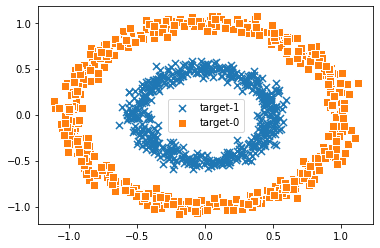

In [103]:
visual_cluster_plt(cluster_df)
# 데이터 포인트의 분포도가 기하학적으로 생겼다.
# 영역이 분리되어 있지 않고 속해있거나 등의 형태

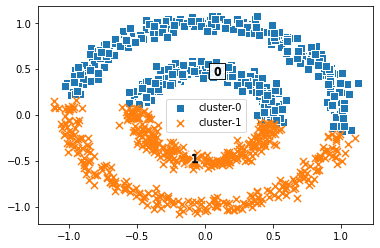

In [104]:
# KMeans => 군집개수 2, 반복횟수 1000, 난수 0
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
cluster_df['kmeans_labels'] = kmeans.fit_predict(X)
# 시각화
visual_cluster_plt(cluster_df, 'kmeans_labels', True, kmeans)

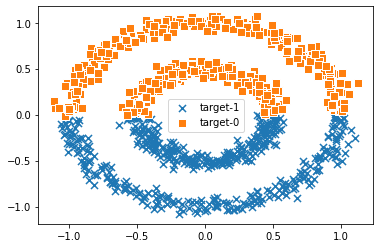

In [105]:
# GMM => 군집개수 2, 난수 0
gmm = GaussianMixture(n_components=2, random_state=0)
cluster_df['gmm_labels'] = gmm.fit_predict(X)
# 시각화
visual_cluster_plt(cluster_df, 'gmm_labels', False, gmm)

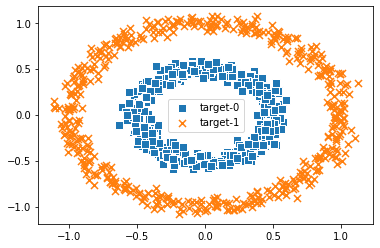

In [106]:
# DBSCAN => 입실론 반경 0.2, 반경 내 최소 샘플수(자신 포함) 10
dbscan = DBSCAN(eps=0.2, min_samples=10)
cluster_df['dbscan_labels'] = dbscan.fit_predict(X)
# 시각화
visual_cluster_plt(cluster_df, 'dbscan_labels', False, dbscan)

# 군집화 실습
- 고객 세분화 기법
  - 고객 세그먼테이션
  - 다양한 기준으로 고객을 분류하는 기법
  - CRM, 마케팅에 중요 요소

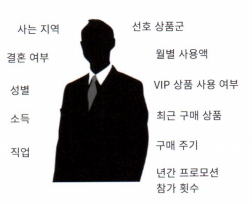

In [107]:
s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_cus_1.png', width=400)

# 고객 세분화 전략의 주요 목표는 타겟마케팅이다.

s('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/cluster_cus_1.png', width=400)

# 고객 세분화 전략의 주요 목표는 타겟마케팅이다.
# 고객의 어떤 정보를 이용하여 군집화할 것이다. => RFM 기법을 사용
# R(Recency) : 가장 최근 상품 구입일로부터 오늘까지 경과된 기간(분석기준일)
# F(Frequency) : 상품 구매 횟수(컨텐츠 이용횟수)
# M(Monetary Value) : 총 구매 금액(쇼핑몰 기준)

```
고객 데이터
경로 
  /content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/Online Retail.xlsx
출처
  https://archive.ics.uci.edu/ml/datasets/Online+Retail
```

### 연구목표
- 군집화, 고객 세분화
  - RFM기법을 이용하여 고객을 군집화한다.

### 데이터 획득
- [Online Retail.xlsx](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

In [108]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
# 데이터 로드
retail_df = pd.read_excel('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/6_data/Online Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [146]:
'''
'InvoiceNo' : 주문번호, c로 시작하면 취소 주문
'StockCode' : 제품코드
'Description' : 제품 설명
'Quantity' : 주문 시 제품의 개수
'InvoiceDate' : 주문일자
'UnitPrice' : 제품의 단가
'CustomerID' : 고객 번호
'Country' : 고객 거주 국가
'''
# R(Recency) : 가장 최근 상품 구입일로부터 오늘까지 경과된 기간(분석기준일)
# F(Frequency) : 상품 구매 횟수(컨텐츠 이용횟수)
# M(Monetary Value) : 총 구매 금액(쇼핑몰 기준)
'''
대상 고객을 정의 -> 결측 제거! 특정 국가에 집중되어 있어서, 편차가 너무 크면 특정 국가로 한정하는 것도 검토해야 한다.
R : InvoiceDate 기준으로 정렬 -> 현재 날짜로부터 가장 최근에 구매한 날짜까지 경과한 day(일수)
F : 주문의 총 개수(횟수)
M : UnitPrice(개수) * Quantity(단가), 주문별 총합
'''

retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Amount'],
      dtype='object')

#### 대상 특정

In [111]:
# 전체 데이터에 대한 통찰
# 결측 여부, 확인 -> 컬럼별로 확인하고 싶다, 데이터에 대한 정보를 보고싶다.
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [112]:
# info()를 통해 일부 결측치가 존재함이 확인되었다. => 대상을 특정
retail_df.shape

(541909, 8)

### 데이터 준비
1. 대상이 되는 데이터를 추출
2. RFM에 맞게끔 컬럼을 구성한다
3. 군집화 구현

#### 대상 데이터 추출

In [113]:
# 대상이 되는 데이터를 추출 -> 데이터 정제
retail_df = retail_df[retail_df['Quantity'] > 0]          # 주문 수량이 0개 이상
retail_df = retail_df[retail_df['UnitPrice'] > 0]         # 제품 단가가 0 이상
retail_df = retail_df[retail_df['CustomerID'].notnull()]    # 데이터가 존재하는 것만 남긴다.
retail_df.shape
# 데이터가 대량 16만개 정도 정제되었다.

(397884, 8)

In [114]:
# 컬럼별로 결측치 확인 -> 모든 컬럼에서 결측이 제거되었음을 알 수 있다.
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [115]:
# 고객 거주 국가 검토
retail_df['Country'].value_counts()[:10]
# United Kingdom의 고객 비율이 압도적이다 -> 영국 고객만 대상으로 처리하겠다.(설정)

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: Country, dtype: int64

In [116]:
retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
retail_df.shape
# 354321개 데이터

(354321, 8)

#### RFM - 컬럼을 구성

In [117]:
'''
'InvoiceNo' : 주문번호, c로 시작하면 취소 주문
'StockCode' : 제품코드
'Description' : 제품 설명
'Quantity' : 주문 시 제품의 개수
'InvoiceDate' : 주문일자
'UnitPrice' : 제품의 단가
'CustomerID' : 고객 번호
'Country' : 고객 거주 국가
'''
# Amount : 제품수량 * 제품단가 => 주문 1개에 대한 구매비용
retail_df['Amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
# 고객 아이디는 정수로 저장
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [118]:
# 고객별로 총 구매금액을 합산해서 정렬, 상위 5개 출력
retail_df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False)[:10]
# 상위 3명의 아이디가 주문총액의 비중이 크다. 몇몇 고객이 큰 주문금액을 가지고 있다.
# 이 데이터에는 단체 주문이 있었다. => 3명의 고객이 주문금액이 큰 이유!

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
12346     77183.60
16684     66653.56
14096     65164.79
13694     65039.62
15311     60767.90
Name: Amount, dtype: float64

In [119]:
# RFM에 해당되는 컬럼 준비
operation={
    # 대상 컬럼 : 처리함수
    'InvoiceDate' : 'max',  # R
    'InvoiceNo' : 'count',  # F, 취소(c로 시작)까지는 검토 X
    'Amount' : 'sum'        # M
}
cus_df = retail_df.groupby('CustomerID').agg(operation)
cus_df.head()

,InvoiceDate,InvoiceNo,Amount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [120]:
# 컬럼명을 정확하게 대체
cus_df.columns = ['Recency','Frequency','Monetary']
cus_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [121]:
# CustomerID를 컬럼으로 이동시킨다.
cus_df.reset_index(inplace=True)
cus_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34


In [122]:
# 오늘은 현 데이터 기준 마지막 데이터 다음날이다. 10/12/2011
# Recency는 고객별 마지막 구매일로부터 지금 분석을 하는 날까지 경과 day(일)
import datetime as dt
dt.datetime(2011,12,10) - cus_df['Recency']
# 가장 최근 구매일 경우에는 24시간이 지나지않아서 0 days가 된다. 보정하든지 무시하든지 결정할 필요가 있다.

0      325 days 13:59:00
1        2 days 09:26:00
2        0 days 11:40:00
3        3 days 14:04:00
4        3 days 08:48:00
              ...       
3915   277 days 14:08:00
3916   180 days 13:07:00
3917     7 days 12:17:00
3918     3 days 11:58:00
3919    42 days 14:31:00
Name: Recency, Length: 3920, dtype: timedelta64[ns]

In [123]:
tmp = dt.datetime(2011,12,10) - cus_df['Recency']
type(tmp)

pandas.core.series.Series

In [124]:
tmp[0].days + 1
# 0 days에 대한 보정으로 +1

326

In [125]:
tmp.apply(lambda x : x.days + 1)

0       326
1         3
2         1
3         4
4         4
       ... 
3915    278
3916    181
3917      8
3918      4
3919     43
Name: Recency, Length: 3920, dtype: int64

In [126]:
cus_df['Recency'] = tmp.apply(lambda x : x.days + 1)
cus_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

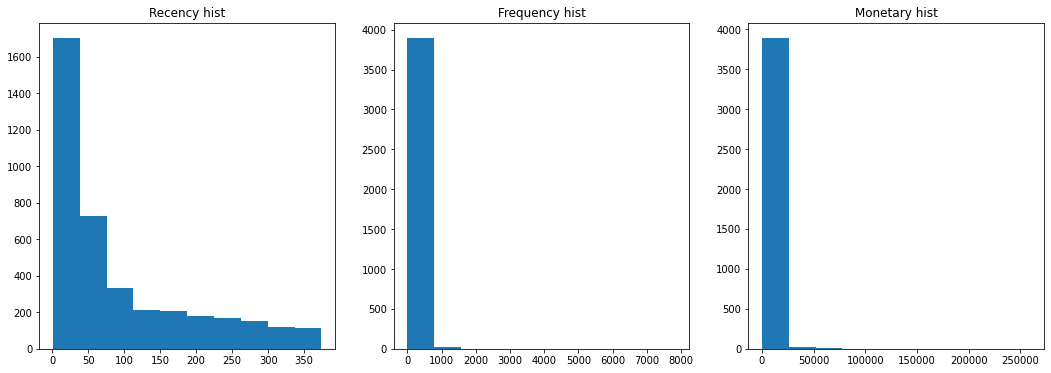

In [127]:
# 일부 소매업체에서 대규모로 주문을 한 내역이 존재한다.(사전 제공 정보)
# 고객 세분화 작업을 하는 데 있어서, 매우 왜곡된 데이터 분포를 가질 수 있다.
# 한쪽 군집으로 쏠릴 수(집중될 수) 있다.
# 확인 -> 히스토그램
chart_num = 3     # 3개의 속성에 대해 히스토그램 플로팅
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(6*chart_num,6), nrows=1, ncols=chart_num)

ax1.set_title('Recency hist')
ax2.set_title('Frequency hist')
ax3.set_title('Monetary hist')

ax1.hist(cus_df['Recency'])
ax2.hist(cus_df['Frequency'])
ax3.hist(cus_df['Monetary'])

# Frequency, Monetary는 값 간의 편차가 너무 크고 왜곡된 분포도를 보인다.

In [128]:
# 통계 요약
cus_df.iloc[:, 1:].describe()
# 표준편차가 너무 크다. 최대값과 평균 차이도 많이 난다.
# 몇 개의 값이 전체를 왜곡하고 있다.
# 군집화를 해도 변별력이 떨어진다.
# 해결방안 : 로그 혹은 제거

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


#### 절차
- 현 데이터로 군집/평가를 수행
- 로그 처리 후 다시 군집화 후 평가를 수행 (비교 목적)

In [129]:
# 모듈 가져오기
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [130]:
# Recency	Frequency	Monetary에 대해서 값만 추출
X_features = cus_df[ ['Recency', 'Frequency', 'Monetary'] ].values
X_features

array([[3.260000e+02, 1.000000e+00, 7.718360e+04],
       [3.000000e+00, 1.030000e+02, 4.196010e+03],
       [1.000000e+00, 4.595000e+03, 3.371973e+04],
       ...,
       [8.000000e+00, 1.200000e+01, 1.780500e+02],
       [4.000000e+00, 7.560000e+02, 2.094880e+03],
       [4.300000e+01, 7.000000e+01, 1.837280e+03]])

In [131]:
# StandardScaler로 전처리
X_features_scaled = StandardScaler().fit_transform(X_features)
X_features_scaled

array([[ 2.34381090e+00, -4.10449826e-01,  1.00669064e+01],
       [-9.01742172e-01,  5.79114471e-02,  3.11636875e-01],
       [-9.21838476e-01,  2.06841746e+01,  4.25767546e+00],
       ...,
       [-8.51501413e-01, -3.59940277e-01, -2.25389800e-01],
       [-8.91694020e-01,  3.05634195e+00,  3.08070865e-02],
       [-4.99816095e-01, -9.36172002e-02, -3.62284108e-03]])

In [132]:
# 군집 3개, 난수 0, KMeans로 군집화
# cus_df에 군집 결과를 cluster_label에 저장
kmeans = KMeans(n_clusters=3, random_state=0)
cus_df['cluster_label'] = kmeans.fit_predict(X_features_scaled)
cus_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_label
0,12346,326,1,77183.60,2
1,12747,3,103,4196.01,0
2,12748,1,4595,33719.73,2
3,12749,4,199,4090.88,0
4,12820,4,59,942.34,0


In [133]:
# 실루엣 스코어 -> 평균값 출력
# 1에 가까우면 군집이 잘 되었다.
# 0에 가까우면 군집이 잘 안 되었다.
# -1에 가까우면 군집이 겹쳤다. 데이터부터 다시! 해야된다.
silhouette_score( X_features_scaled, cus_df['cluster_label'] )

0.5923691942714455

In [134]:
# 군집 개수가 변화됨에 따라 산포도를 각각 그리는 함수
# cluster_lists : 굱집화하고 싶은 개수의 후보 리스트
# X_features : 군집화를 수행하는 원본 데이터
def visual_cluster_scatter(cluster_lists, X_features):
  # 1. 차트 모양 잡기
  chart_num = len(cluster_lists)
  fig, axs = plt.subplots(figsize=(4*chart_num,4), nrows=1, ncols=chart_num)
  # 2. PCA 압축을 이용하여 2개로 데이터를 생성, 이것을 이용하여 군집화
  pca = PCA(n_components=2, random_state=0)
  tmp = pca.fit_transform(X_features)
  df= pd.DataFrame(tmp, columns=['pca_1','pca_2'])
  # 3. 군집 개수별로 Kmeans 군집화 -> 시각화(산포도)
  markers = ['s', 'x', '^', '+', '*', 'o']
  for idx, cluster_num in enumerate(cluster_lists) :
    # 3-1. 클러스터링 수행
    kmeans = KMeans(n_clusters=cluster_num, max_iter=500, random_state=0)
    # df.values를 써도 OK, tmp를 써도 OK
    df['cluster'] = kmeans.fit_predict(df.values)
    # 3-2. 군집의 개수 : len(df['cluster'].unique == cluster_num
    labels = np.unique(kmeans.labels_)      # 군집을 종류별로 구해서
    # 3-3. 군집별로 분포도를 그린다.
    for label in labels :
      # 3-3-1. 대상 데이터만 추출
      labeled_df = df[df['cluster'] == label] 
      # 3-3-2. 시각화
      axs[idx].scatter(x=labeled_df['pca_1'], y=labeled_df['pca_2'], s=70, edgecolor='k', marker=markers[label], label=f'cluster-{label}')
    axs[idx].legend()
    axs[idx].set_title(f'cluster counts {cluster_num}')
  plt.show()

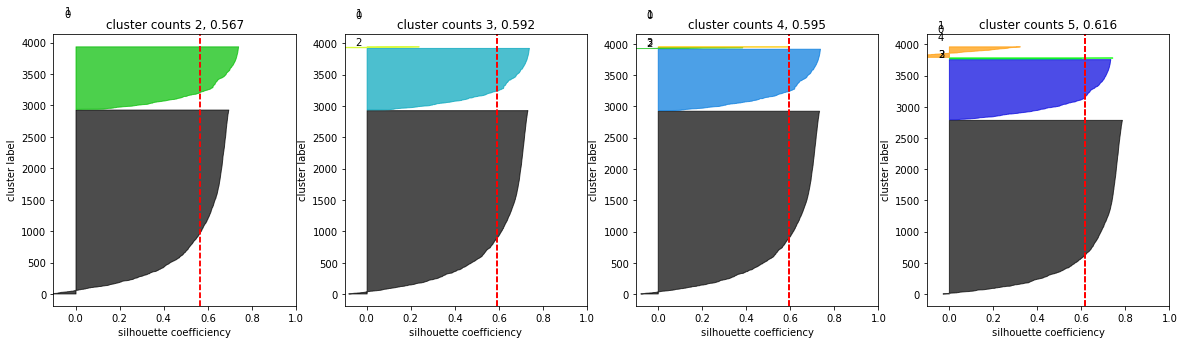

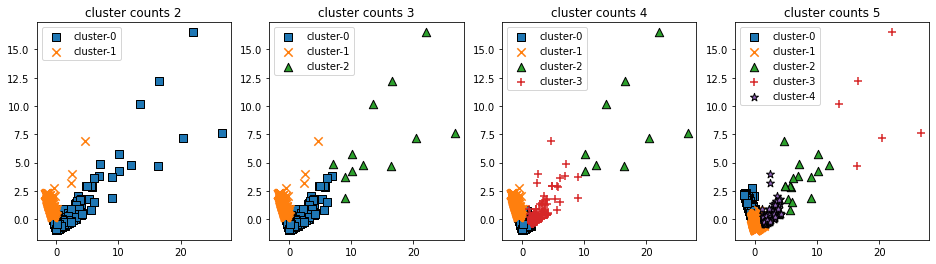

In [135]:
# 군집을 몇개 해야 최적화되는가, 성능이 잘 나오는가, 잘 분류되는가

'''
군집이 2개이면 잘 분류된다.
군집이 3개 이상부터는 특정 군집의 크기가 너무 작다. -> 소수의 고객이 대량 구매를 했기 때문에
이미 왜곡된 데이터에서는 군집을 늘려봤자 동일한 결과가 나온다.

비지도 학습의 목표 : 숨어있는 새로운 집단을 발견한다.
이것을 통해서 데이터를 전혀 다른 각도로 볼 수 있다.(통찰)
'''
visual_silhouette_check([2,3,4,5], X_features_scaled)
# 데이터 분포도 => 산포도
visual_cluster_scatter([2,3,4,5], X_features_scaled)
# 군집 분류는 잘 되지만, 소수 군집이 다수로 존재하게 되어 조정이 필요

#### 로그 처리
- 데이터를 로그 처리 후 군집화

In [136]:
cus_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_label
0,12346,326,1,77183.60,2
1,12747,3,103,4196.01,0
2,12748,1,4595,33719.73,2
3,12749,4,199,4090.88,0
4,12820,4,59,942.34,0


In [137]:
# np.log1p()를 이용하여 데이터 세트의 왜곡 정도를 낮춘다.
cus_df['Recency_log'] = np.log1p(cus_df['Recency'])
cus_df['Frequency_log'] = np.log1p(cus_df['Frequency'])
cus_df['Monetary_log'] = np.log1p(cus_df['Monetary'])
cus_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_label,Recency_log,Frequency_log,Monetary_log
0,12346,326,1,77183.60,2,5.789960,0.693147,11.253955
1,12747,3,103,4196.01,0,1.386294,4.644391,8.342128
2,12748,1,4595,33719.73,2,0.693147,8.432942,10.425868
3,12749,4,199,4090.88,0,1.609438,5.298317,8.316760
4,12820,4,59,942.34,0,1.609438,4.094345,6.849427


In [138]:
cus_df.iloc[:,-3:].describe()
# 평균값 대비 최대값이 2~2.5배 정도로 줄어들었다. 전체적으로 편차가 줄어들었다.

,Recency_log,Frequency_log,Monetary_log
count,3920.000000,3920.000000,3920.000000
mean,3.854807,3.721360,6.546162
std,1.306274,1.260138,1.243661
min,0.693147,0.693147,1.558145
25%,2.944439,2.890372,5.708040
50%,3.951244,3.737670,6.482006
75%,4.969813,4.607658,7.363650
max,5.926926,8.968014,12.467122


In [139]:
# 전처리 수행
X_features = cus_df.iloc[:,-3:].values
X_features_scaled = StandardScaler().fit_transform(X_features)

In [140]:
# KMeans 적용
kmeans = KMeans(n_clusters=3, random_state=0)
cus_df['cluster_label2'] = kmeans.fit_predict(X_features_scaled)
cus_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_label,Recency_log,Frequency_log,Monetary_log,cluster_label2
0,12346,326,1,77183.60,2,5.789960,0.693147,11.253955,2
1,12747,3,103,4196.01,0,1.386294,4.644391,8.342128,1
2,12748,1,4595,33719.73,2,0.693147,8.432942,10.425868,1
3,12749,4,199,4090.88,0,1.609438,5.298317,8.316760,1
4,12820,4,59,942.34,0,1.609438,4.094345,6.849427,1


In [141]:
# 실루엣 계수 평균
silhouette_score(X_features_scaled, cus_df['cluster_label2'])
# 로그 처리 후 점수는 떨어졌다. -> 시각화해서 군집형태를 확인

0.3033962891425885

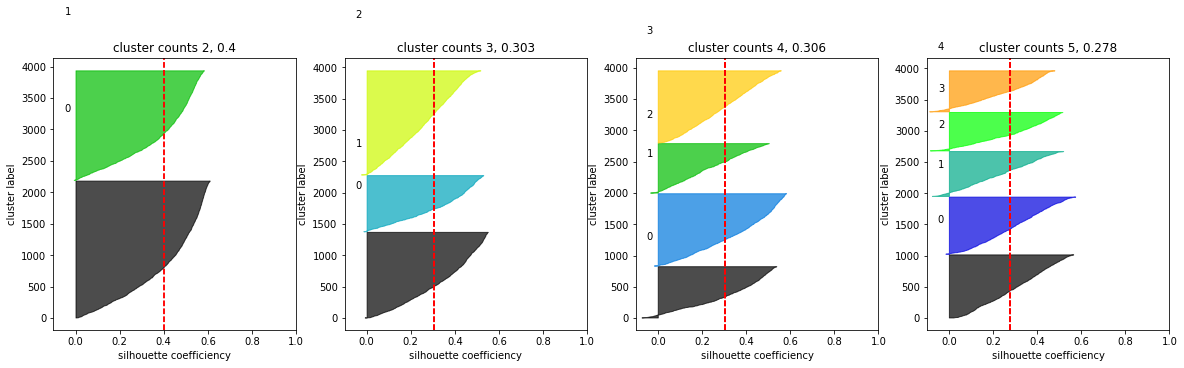

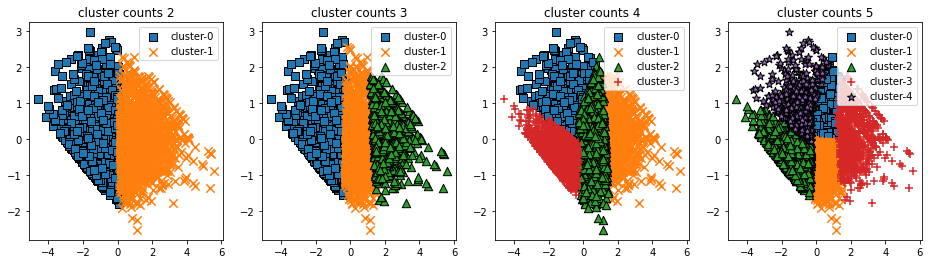

In [142]:
visual_silhouette_check([2,3,4,5], X_features_scaled)
visual_cluster_scatter([2,3,4,5], X_features_scaled)
# 실루엣계수는 떨어졌지만 시각화를 통해서 군집이 더 잘되어있음을 알 수 있다.
# 군집의 크기가 거의 일정 => 균일성 증가했음을 알 수 있다.
# 군집 평가는 실루엣 계수, 시각화 등을 병행하여 종합적으로 판단해야 한다.
# 군집의 성패를 해당 기준으로 군집화하여 서비스/분석 수행 시 성과를 보고 판단!

### 데이터 분석(생략)

### 모델 구축(생략)

### 시스템 통합(생략)